In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix,ConfusionMatrixDisplay ,roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV ,KFold,cross_val_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# **Importing the Dataset**

In [2]:
df = pd.read_csv("/content/forestfires.csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# **Problem Statement :**

* classify the Size_Categorie using SVM



# **Dataset Description :**



1. month -	month of the year: 'jan' to 'dec'
2. day -	day of the week: 'mon' to 'sun'
3. FFMC -	FFMC index from the FWI system: 18.7 to 96.20
4. DMC -	DMC index from the FWI system: 1.1 to 291.3
5. DC -	DC index from the FWI system: 7.9 to 860.6
6. ISI -	ISI index from the FWI system: 0.0 to 56.10
7. temp -	temperature in Celsius degrees: 2.2 to 33.30
8. RH -	relative humidity in %: 15.0 to 100
9. wind -	wind speed in km/h: 0.40 to 9.40
10. rain -	outside rain in mm/m2 : 0.0 to 6.4
11. Size_Categorie - 	the burned area of the forest ( Small , Large)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [5]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [6]:
df.agg(["skew","kurt"])

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
skew,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344,12.846934,1.816105,...,7.401340,4.798308,16.031038,3.646828,5.254127,2.594172,16.031038,22.737634,5.628522,0.712255
kurt,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964,194.140721,1.303265,...,52.984784,21.105386,255.984443,11.343218,25.705276,4.748083,255.984443,517.000000,29.795509,-1.498505


In [7]:
for i in df.columns :
    print(i , '\n', df[i].value_counts())

month 
 aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
day 
 sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
FFMC 
 92.1    28
91.6    28
91.0    22
91.7    19
92.4    16
        ..
86.9     1
85.2     1
53.4     1
85.1     1
94.4     1
Name: FFMC, Length: 106, dtype: int64
DMC 
 99.0     10
129.5     9
231.1     8
142.4     8
35.8      7
         ..
138.1     1
109.2     1
91.6      1
122.3     1
146.0     1
Name: DMC, Length: 215, dtype: int64
DC 
 745.3    10
692.6     9
692.3     8
715.1     8
698.6     8
         ..
565.5     1
503.6     1
589.9     1
85.3      1
106.7     1
Name: DC, Length: 219, dtype: int64
ISI 
 9.6     23
7.1     21
6.3     20
8.4     17
7.0     17
        ..
16.5     1
2.2      1
8.3      1
2.0      1
1.1      1
Name: ISI, Length: 119, dtype: int64
temp 
 17.4    8
19.6    8
15.4    7
20.6    7
20.4    6

In [8]:
for i in df.columns:
    print(i , "\n" , df[i].unique())

month 
 ['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
day 
 ['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']
FFMC 
 [86.2 90.6 91.7 89.3 92.3 91.5 91.  92.5 92.8 63.5 90.9 92.9 93.3 84.9
 89.2 86.3 91.8 94.3 90.2 93.5 91.4 92.4 93.4 88.6 90.3 90.  88.1 79.5
 94.8 90.1 94.2 87.2 87.6 92.1 92.6 84.  86.6 93.  91.1 91.2 88.8 84.2
 89.7 83.9 69.  82.1 85.9 84.4 68.2 93.7 85.8 95.5 95.2 96.  85.6 81.5
 86.8 93.9 90.8 90.7 88.3 92.2 81.9 88.  83.  93.1 91.9 91.6 87.5 93.6
 84.6 85.4 84.7 86.9 85.2 90.4 53.4 85.1 89.6 50.4 88.2 92.  18.7 90.5
 84.1 85.  87.9 94.6 87.1 92.7 88.9 89.4 94.  75.1 91.3 93.2 94.9 95.
 95.1 95.8 95.9 96.2 96.1 94.5 81.6 94.4]
DMC 
 [ 26.2  35.4  43.7  33.3  51.3  85.3  88.9 145.4 129.5  88.   73.2  70.8
 126.5 133.3 141.2  35.8  32.8  27.9  27.4  78.5  96.3 110.9 139.4 142.4
 117.9 149.3  85.1  91.8  69.7  75.6  80.7  41.5  25.7  60.6  96.9 108.3
  82.9  62.3  23.9  52.2 137.   99.6 111.2 114.3  46.5   9.3  13.2  75.3
 103.2  48.3 147.3   6.8 

In [9]:
# find categorical and numeric variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in df.columns if df[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 3 categorical variables

The categorical variables are :
 ['month', 'day', 'size_category']


There are 28 Numeric variables

The Numeric variables are :
 ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']


## **Visualization**

Skew: -6.575605977178827
Kurtosis: 67.0660405444626


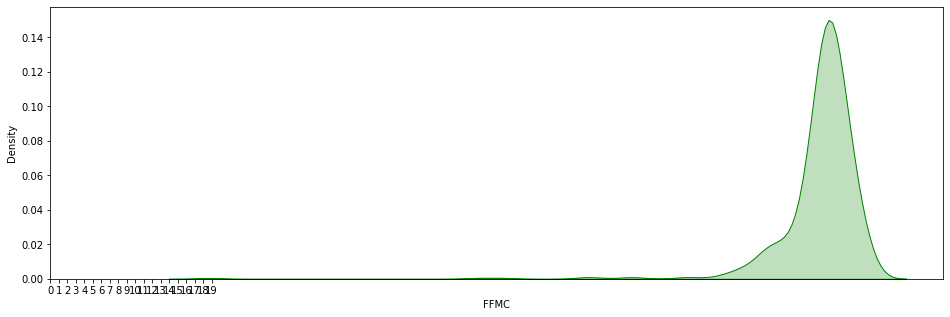

Skew: 0.5474977944865835
Kurtosis: 0.20482178131305062


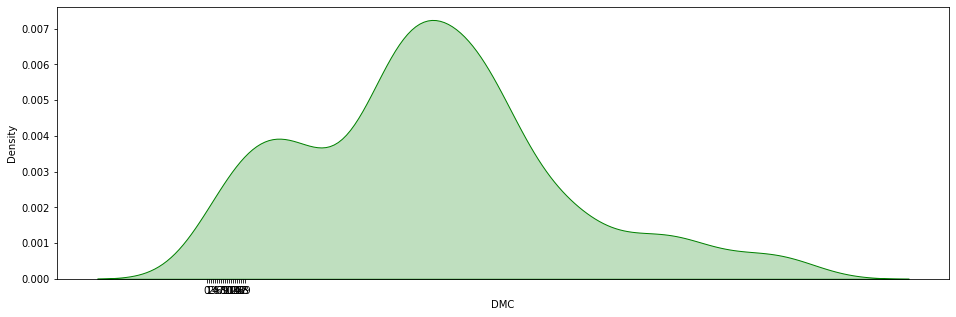

Skew: -1.1004451245649132
Kurtosis: -0.24524351903325803


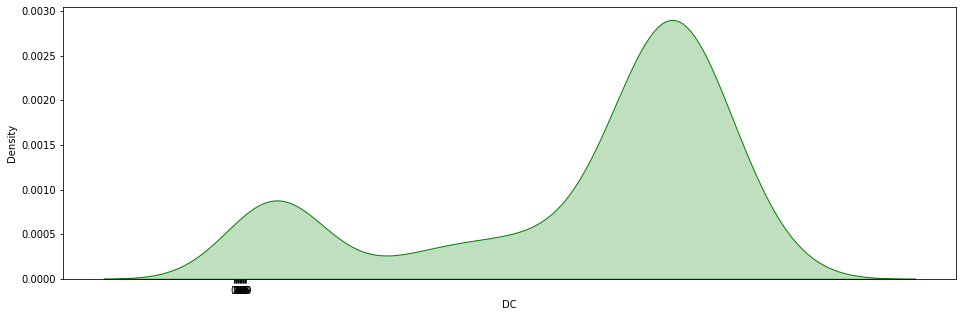

Skew: 2.5363252664156875
Kurtosis: 21.458036504422903


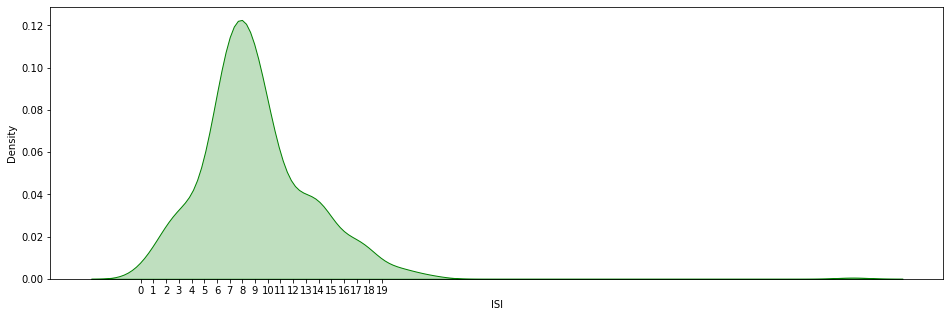

Skew: -0.331172237347285
Kurtosis: 0.1361655076587991


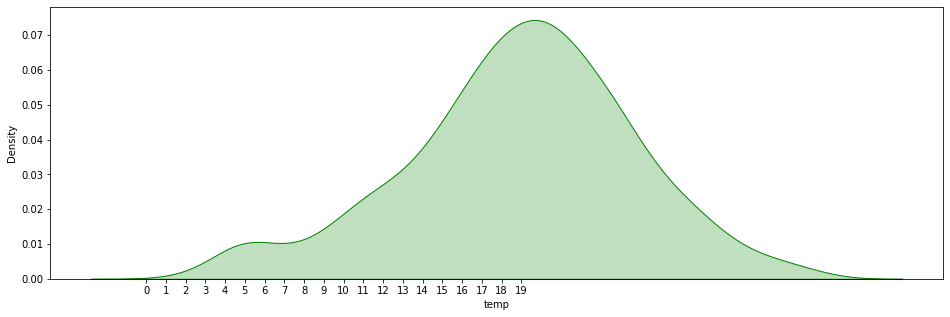

Skew: 0.8629040078552522
Kurtosis: 0.43818285603905727


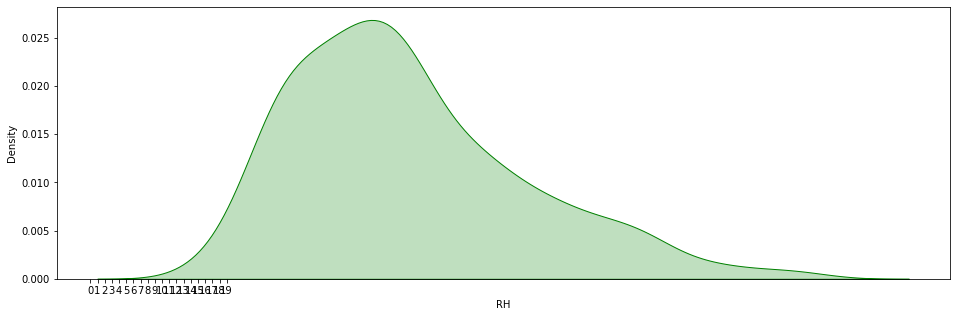

Skew: 0.5710011270000588
Kurtosis: 0.0543238171099949


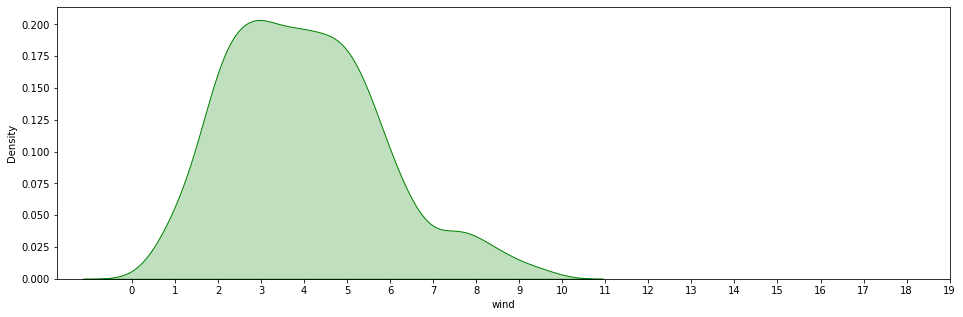

Skew: 19.816343982813166
Kurtosis: 421.29596360804624


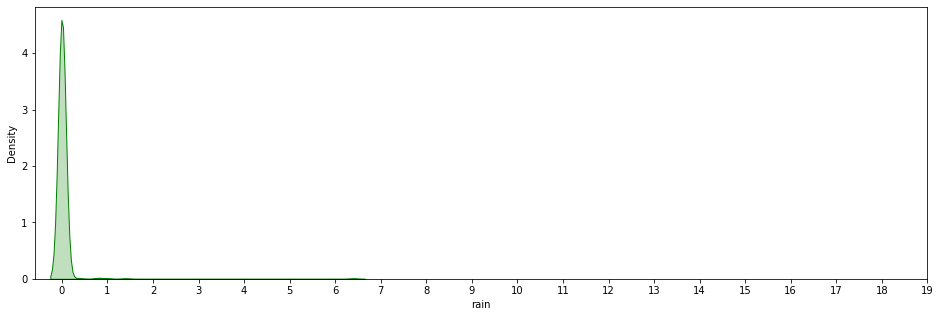

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


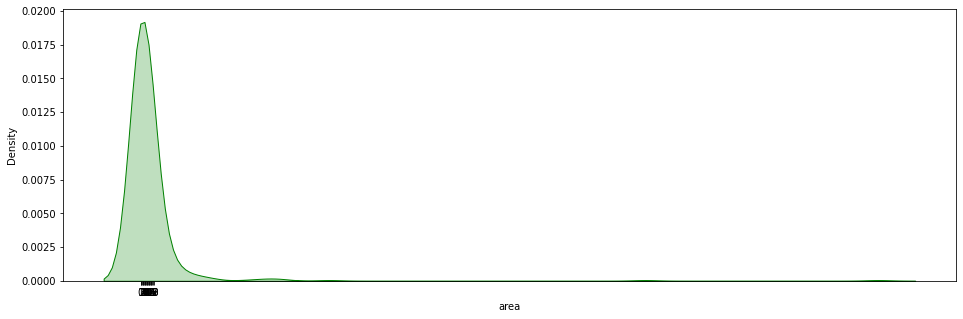

Skew: 1.816105325119183
Kurtosis: 1.3032652405653944


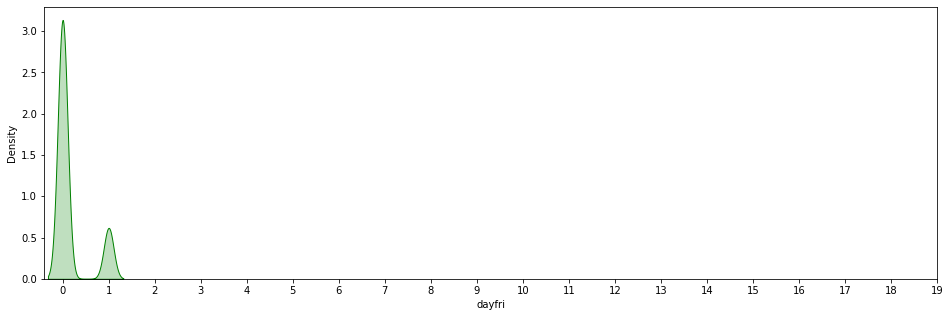

Skew: 2.043955971499404
Kurtosis: 2.1861983295659875


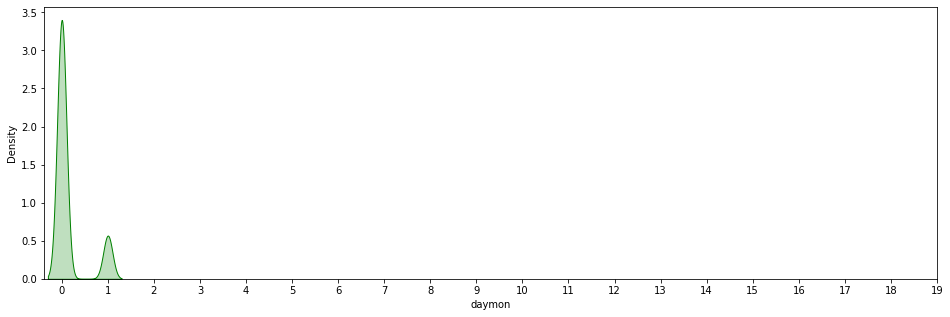

Skew: 1.8352901302024984
Kurtosis: 1.3735885966279935


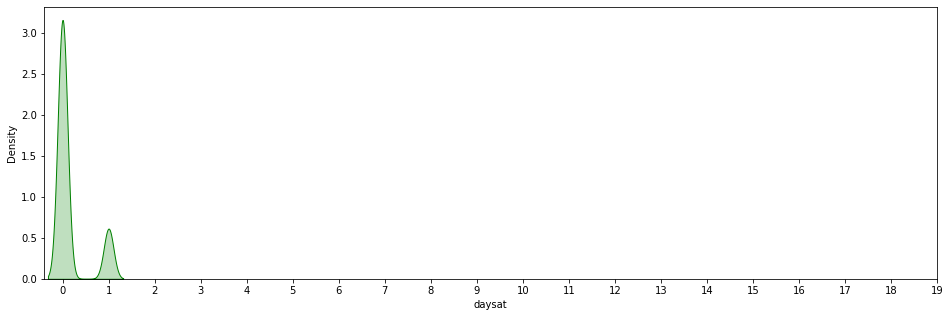

Skew: 1.637919743208418
Kurtosis: 0.6854176297580743


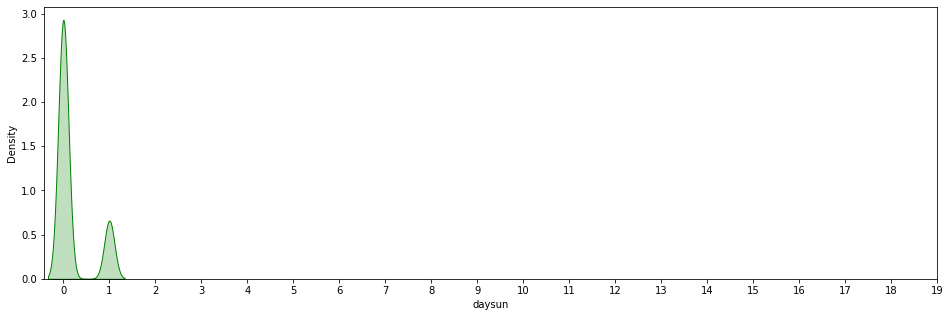

Skew: 2.3752681761566667
Kurtosis: 3.656027259420657


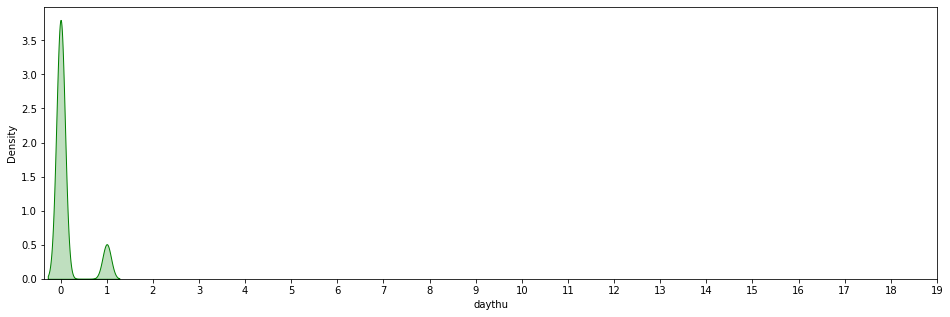

Skew: 2.2912548995147417
Kurtosis: 3.2624548299888834


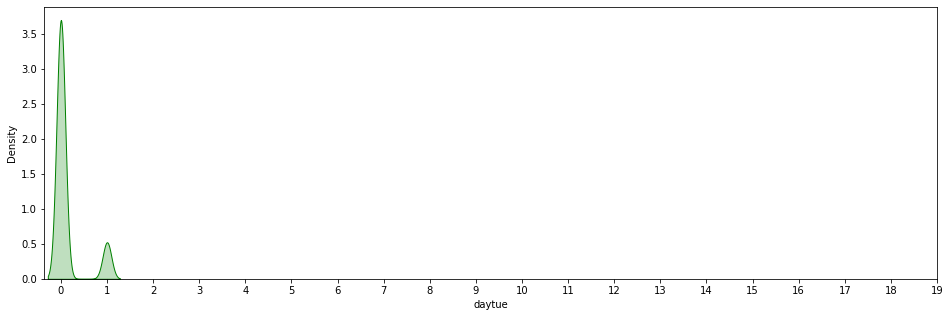

Skew: 2.5941723488922106
Kurtosis: 4.7480831457551265


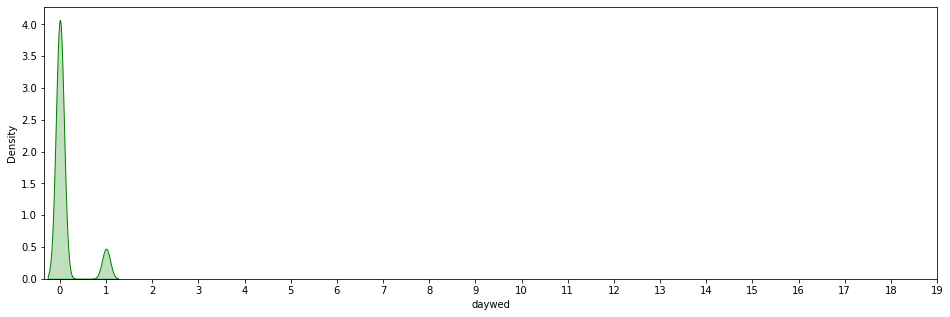

Skew: 7.4013395390994985
Kurtosis: 52.98478366510333


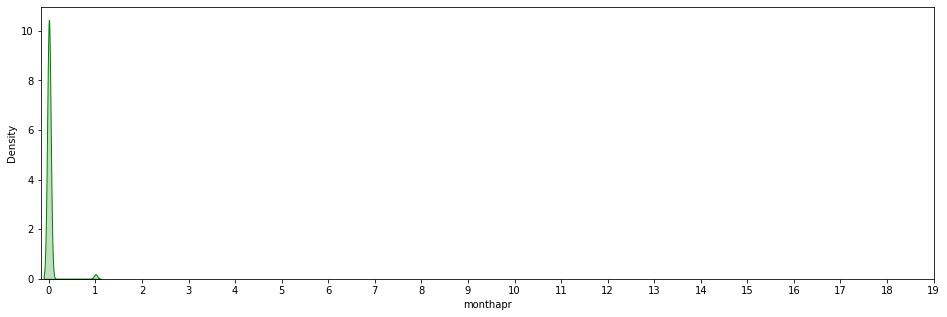

Skew: 0.6036957708921178
Kurtosis: -1.6419181724161918


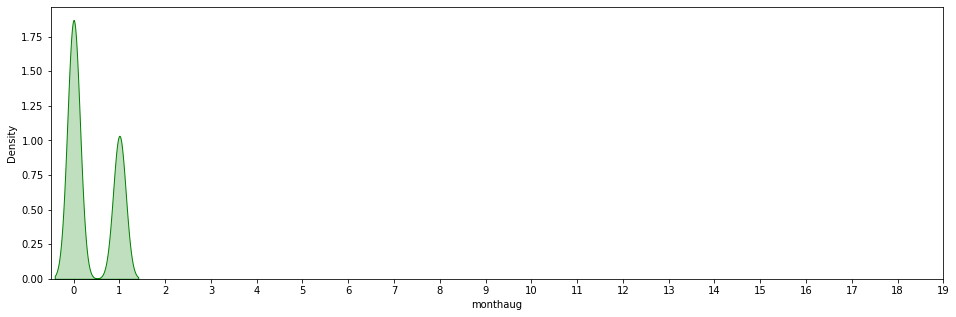

Skew: 7.401339539099495
Kurtosis: 52.984783665103265


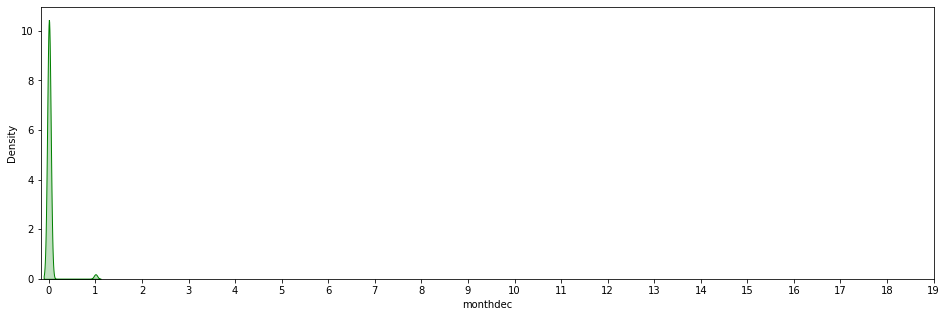

Skew: 4.798307542352639
Kurtosis: 21.10538648459835


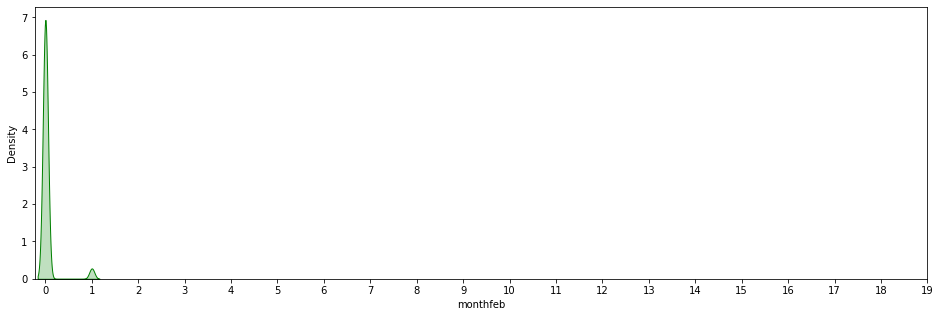

Skew: 16.031038092629355
Kurtosis: 255.98444339711563


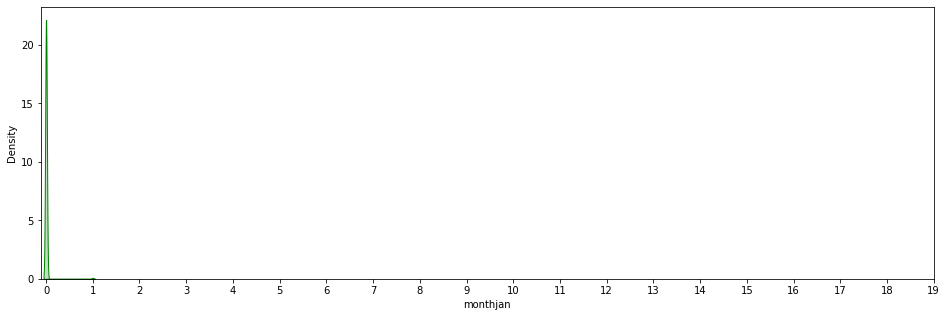

Skew: 3.64682763269993
Kurtosis: 11.343218038257778


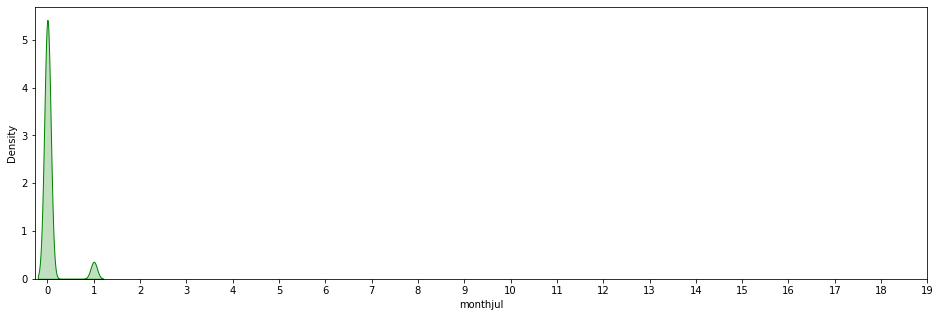

Skew: 5.2541269407021165
Kurtosis: 25.705275798820917


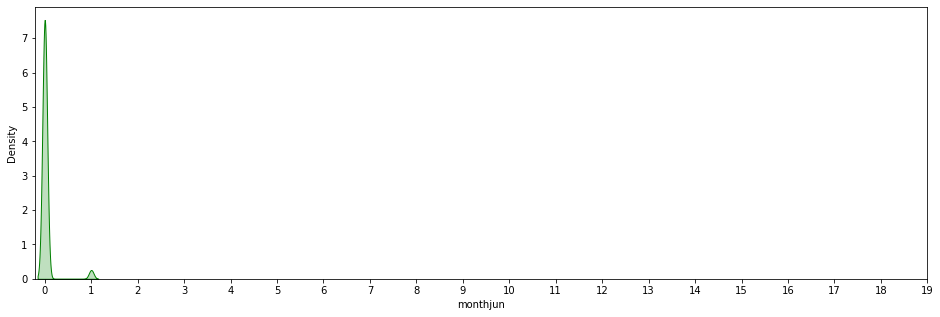

Skew: 2.5941723488922093
Kurtosis: 4.748083145755123


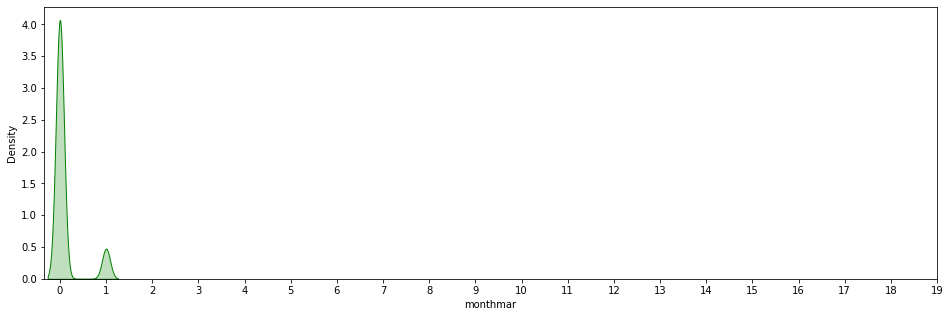

Skew: 16.031038092629352
Kurtosis: 255.98444339711557


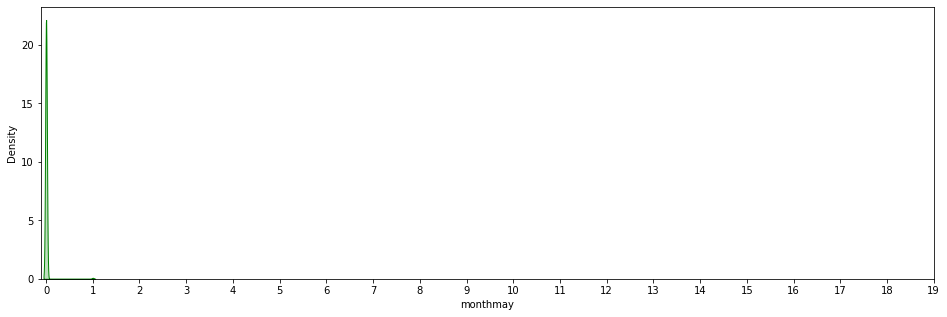

Skew: 22.73763400180415
Kurtosis: 517.0000000000001


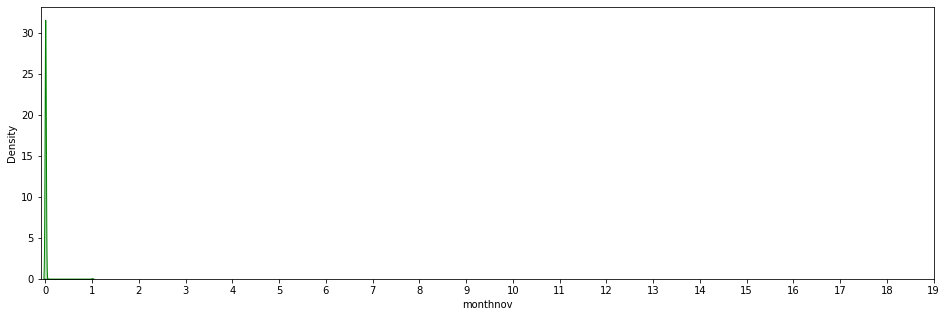

Skew: 5.628521980484524
Kurtosis: 29.795508644279014


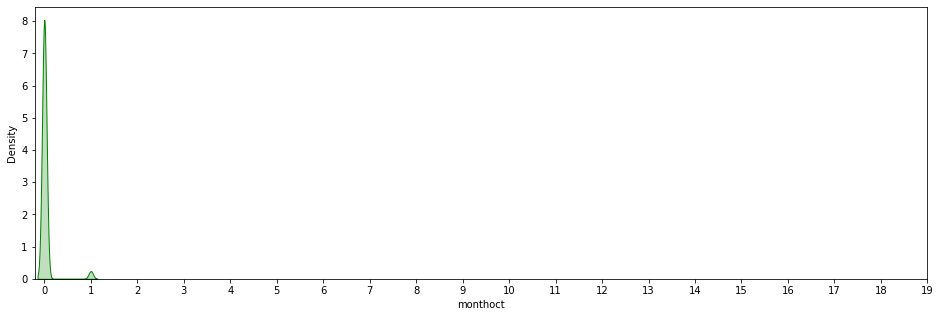

Skew: 0.7122545388352447
Kurtosis: -1.4985054358091627


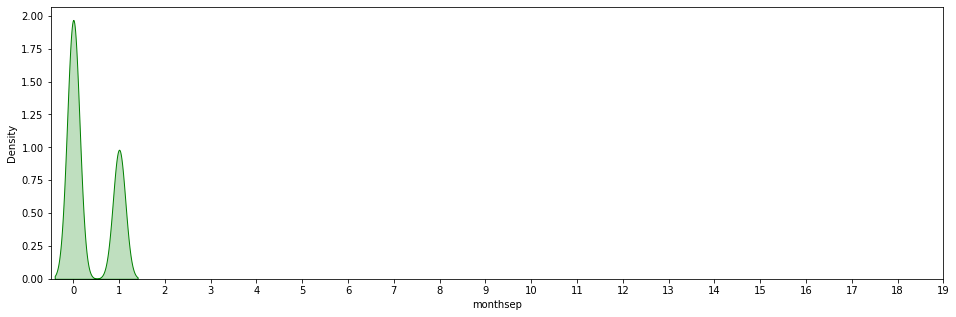

In [10]:
for i in numeric:
  plt.figure(figsize=(16,5))
  print("Skew: {}".format(df[i].skew()))
  print("Kurtosis: {}".format(df[i].kurtosis()))
  ax = sns.kdeplot(df[i],shade=True,color='g')
  plt.xticks([i for i in range(0,20,1)])
  plt.show()


<Figure size 432x288 with 0 Axes>

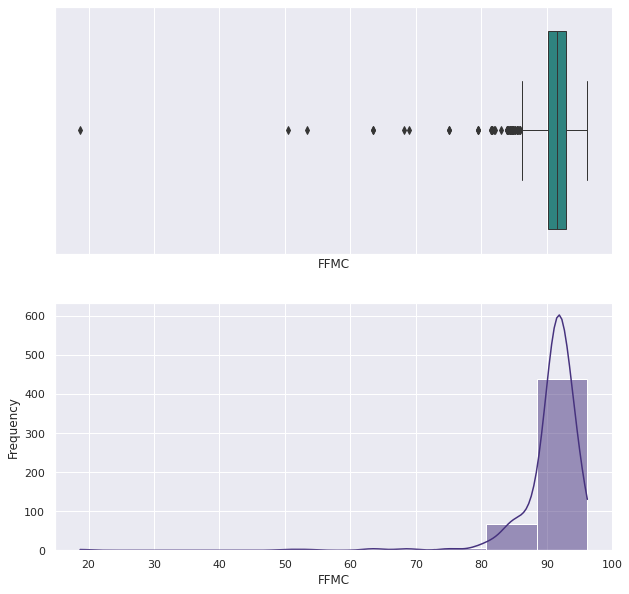

<Figure size 720x720 with 0 Axes>

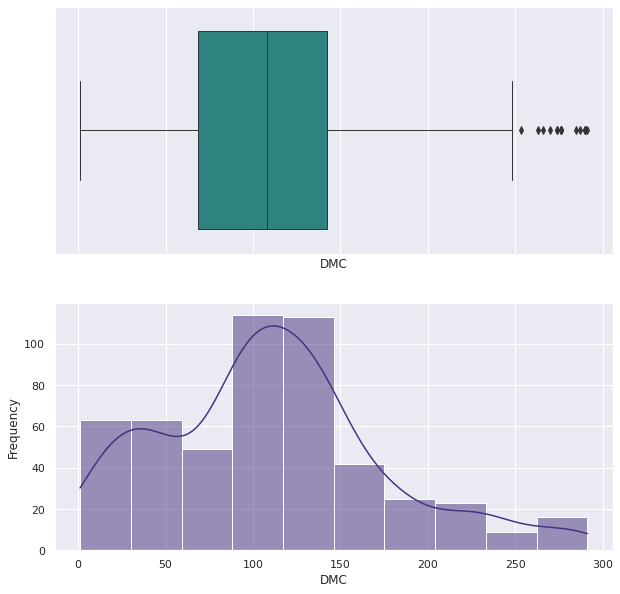

<Figure size 720x720 with 0 Axes>

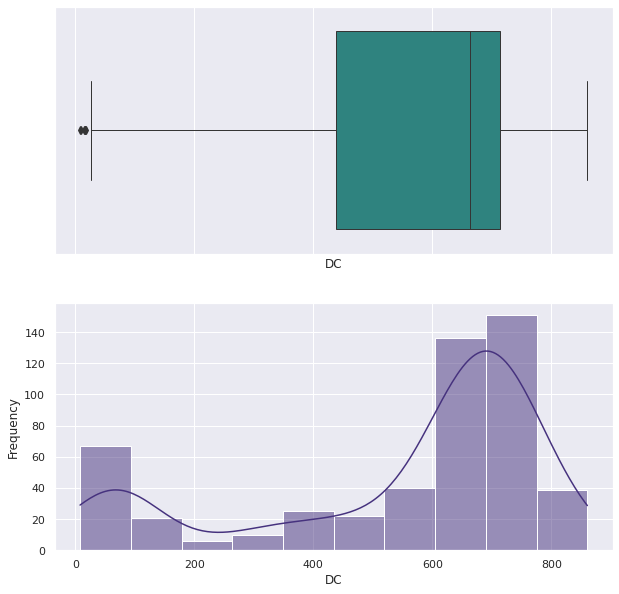

<Figure size 720x720 with 0 Axes>

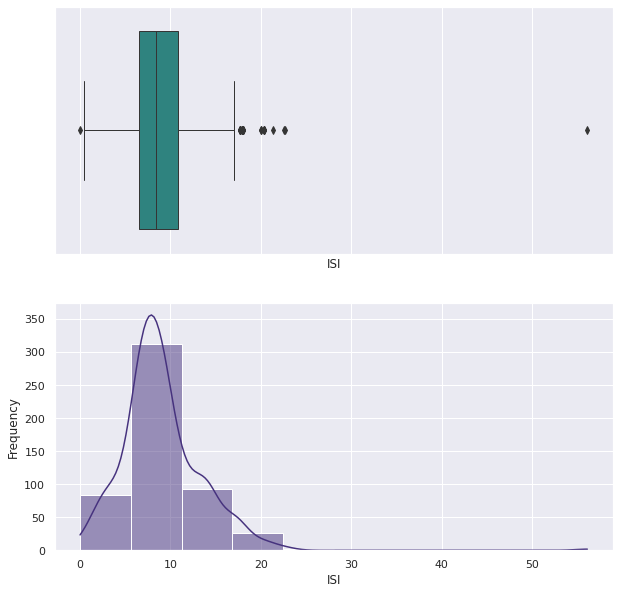

<Figure size 720x720 with 0 Axes>

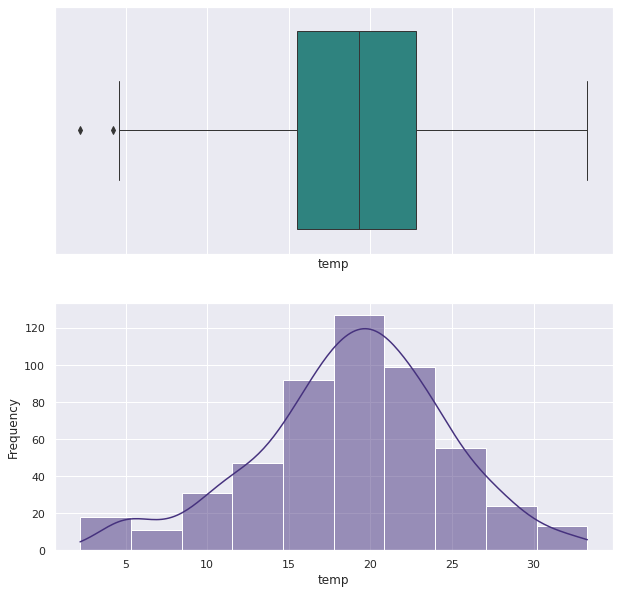

<Figure size 720x720 with 0 Axes>

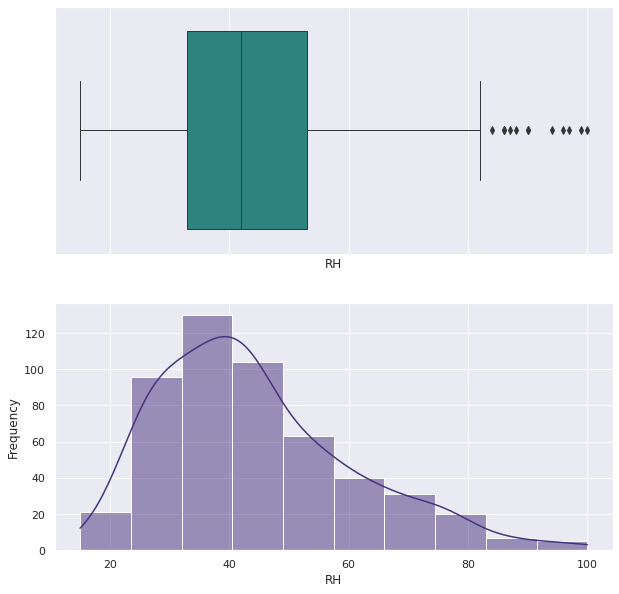

<Figure size 720x720 with 0 Axes>

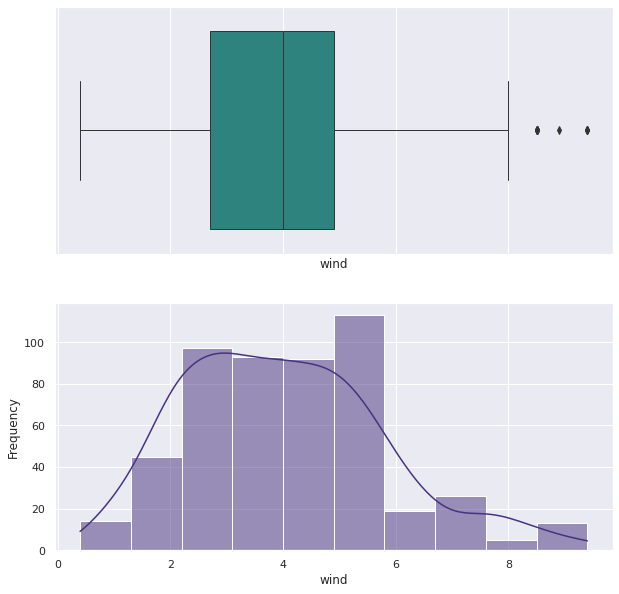

<Figure size 720x720 with 0 Axes>

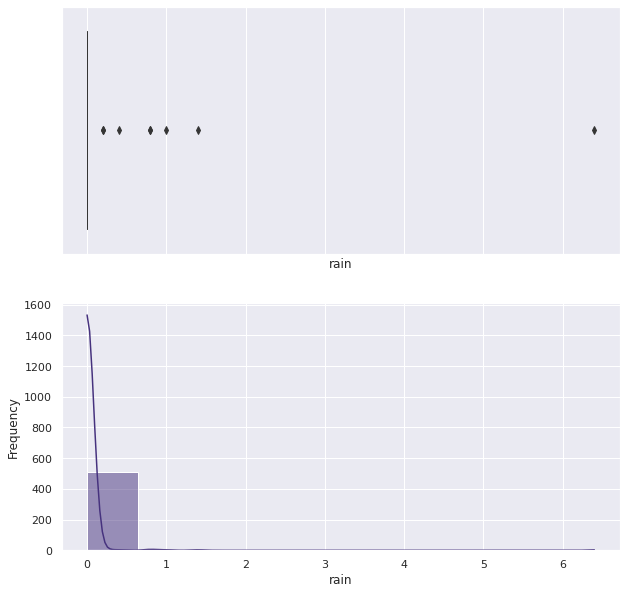

<Figure size 720x720 with 0 Axes>

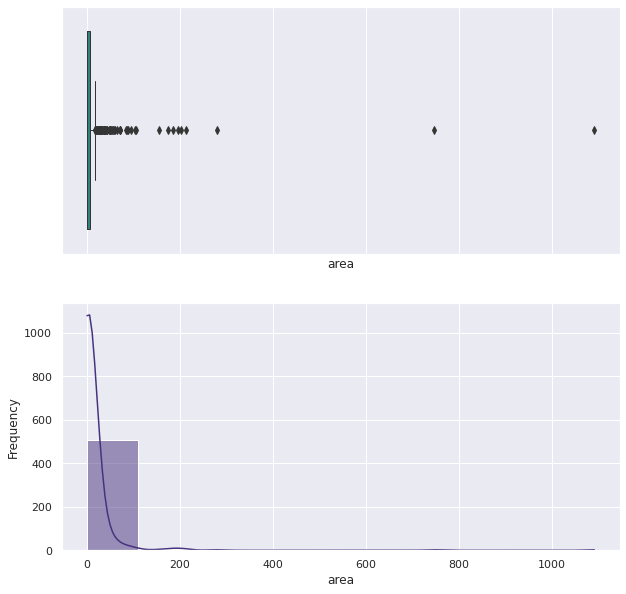

<Figure size 720x720 with 0 Axes>

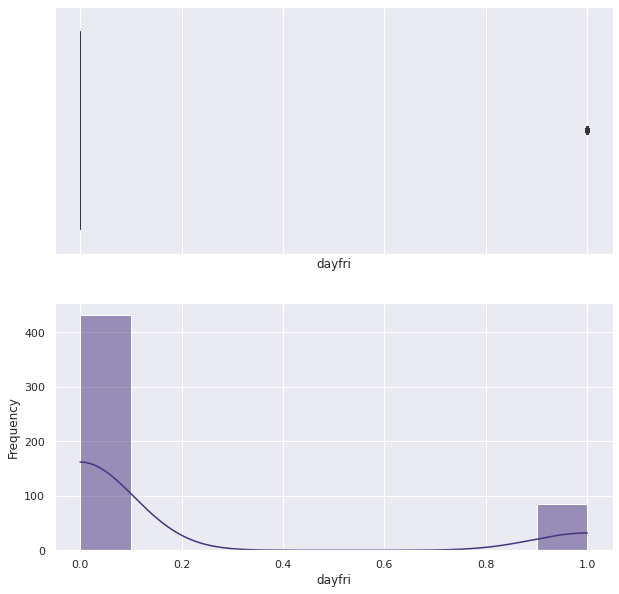

<Figure size 720x720 with 0 Axes>

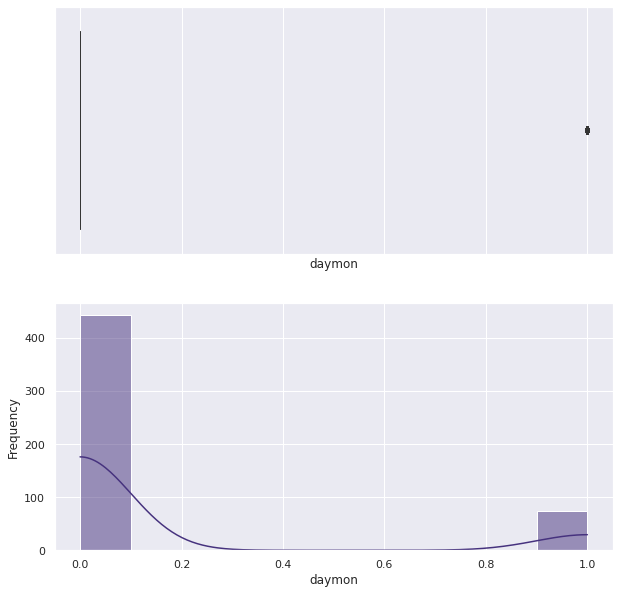

<Figure size 720x720 with 0 Axes>

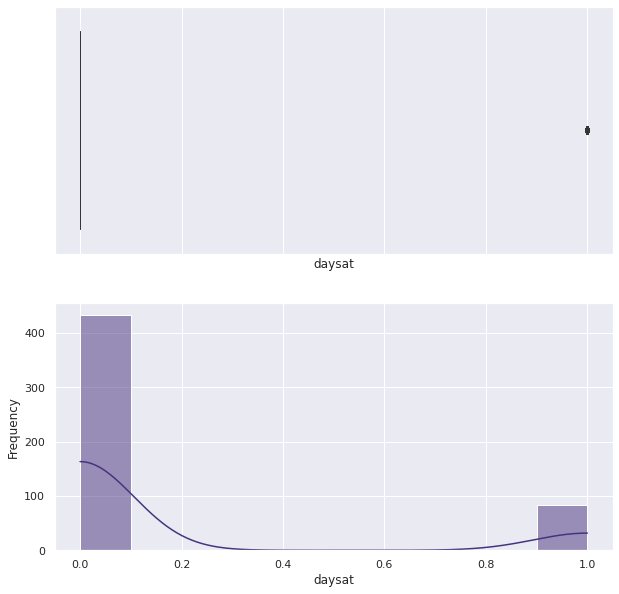

<Figure size 720x720 with 0 Axes>

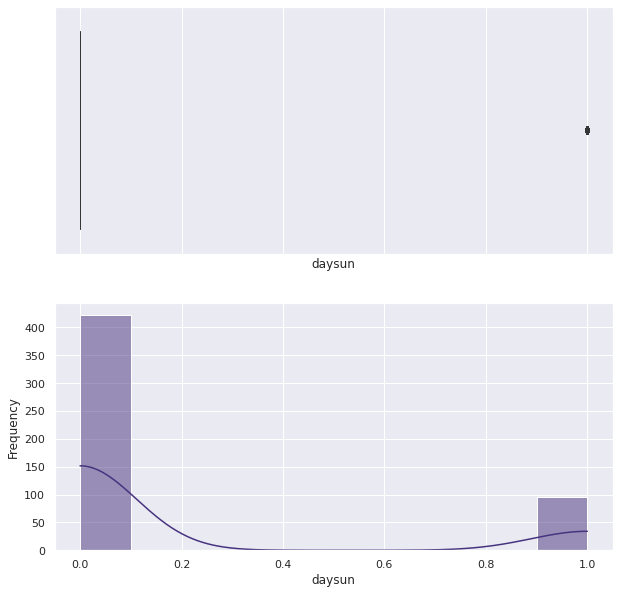

<Figure size 720x720 with 0 Axes>

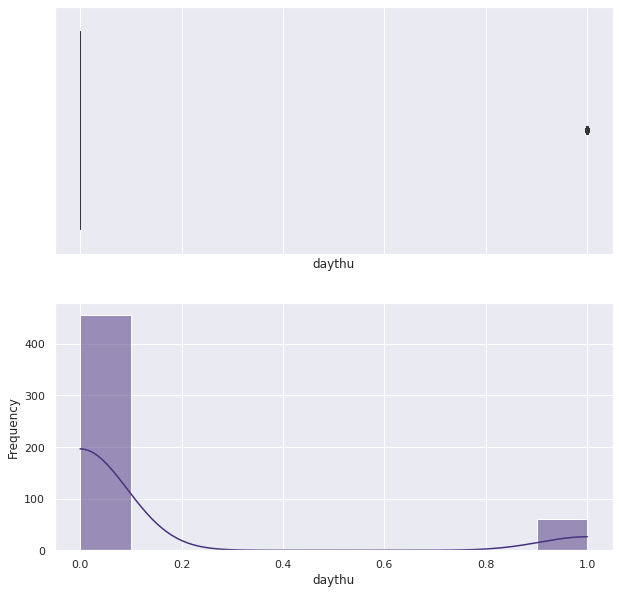

<Figure size 720x720 with 0 Axes>

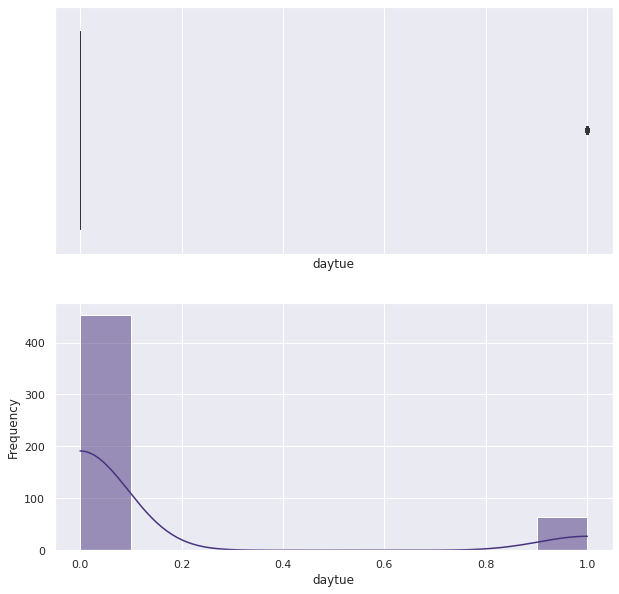

<Figure size 720x720 with 0 Axes>

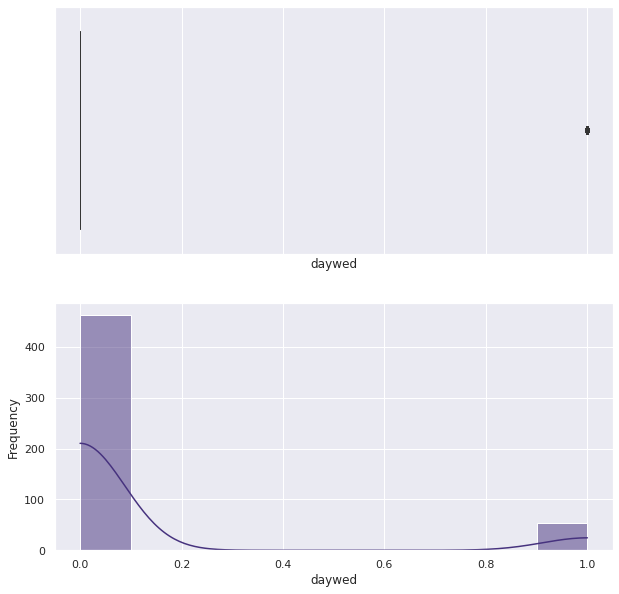

<Figure size 720x720 with 0 Axes>

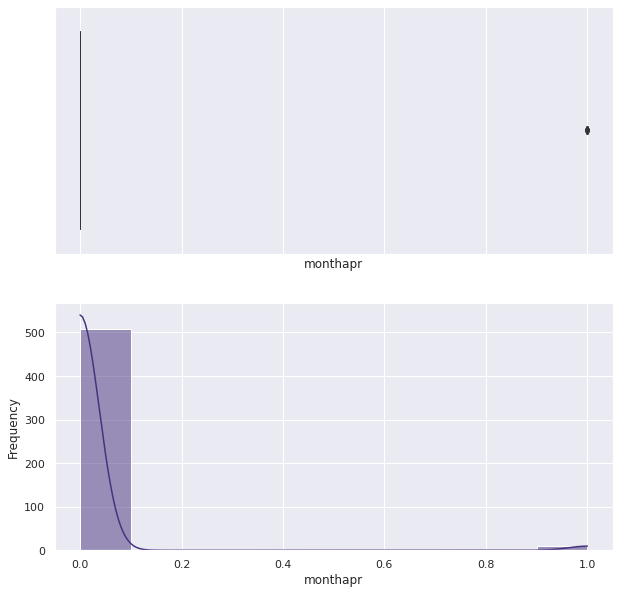

<Figure size 720x720 with 0 Axes>

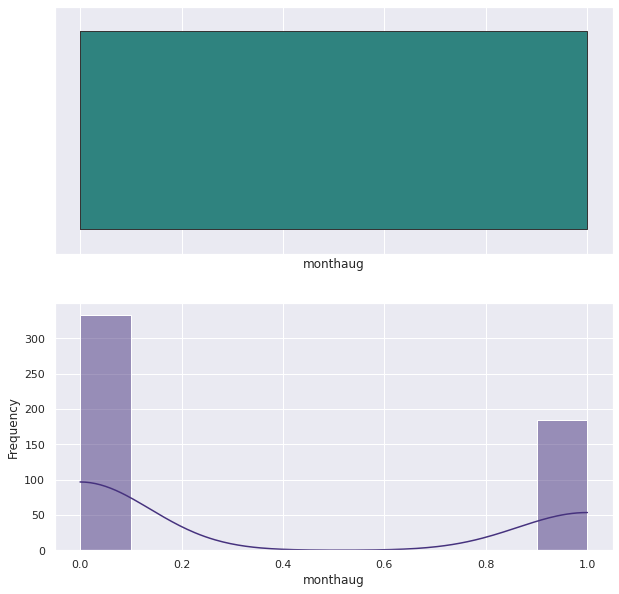

<Figure size 720x720 with 0 Axes>

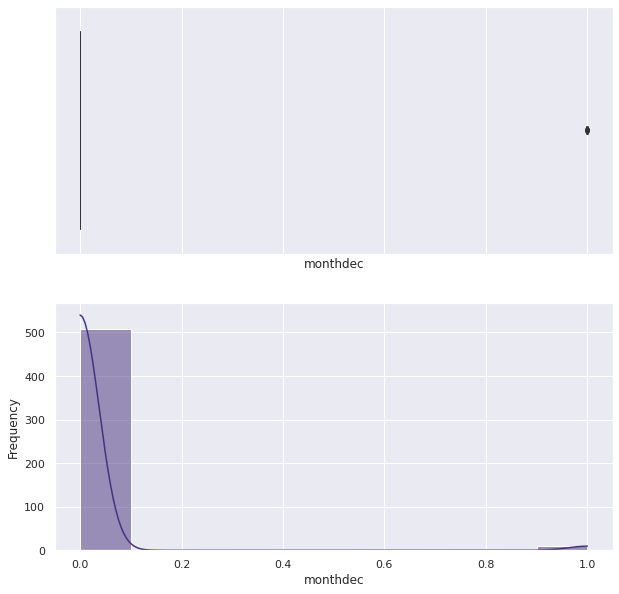

<Figure size 720x720 with 0 Axes>

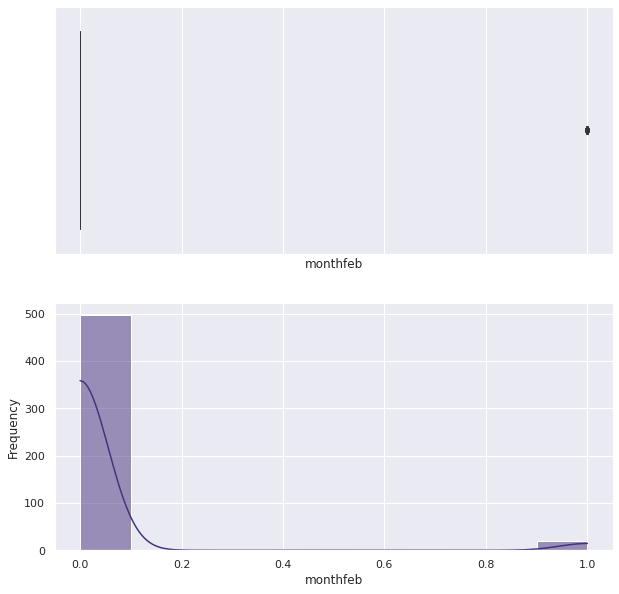

<Figure size 720x720 with 0 Axes>

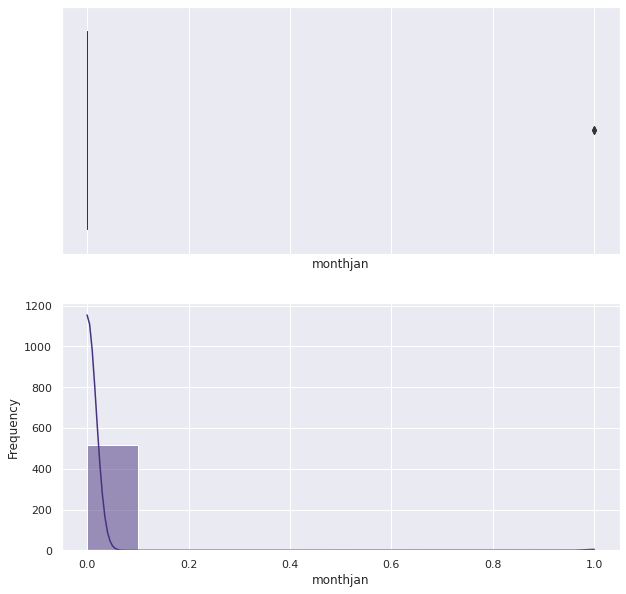

<Figure size 720x720 with 0 Axes>

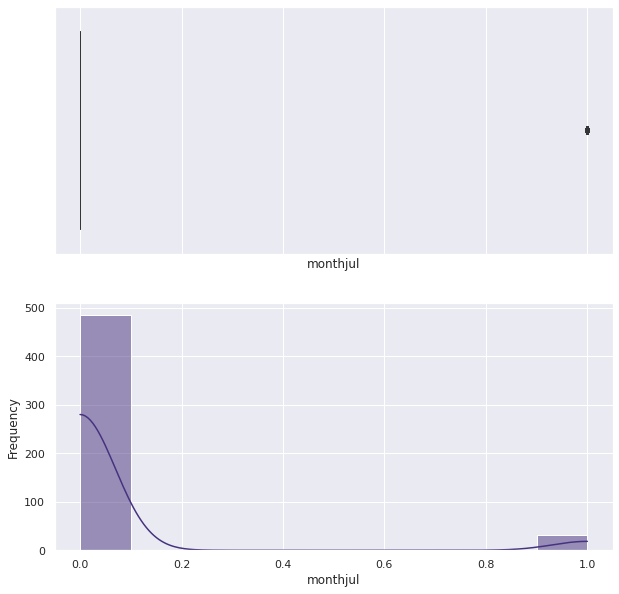

<Figure size 720x720 with 0 Axes>

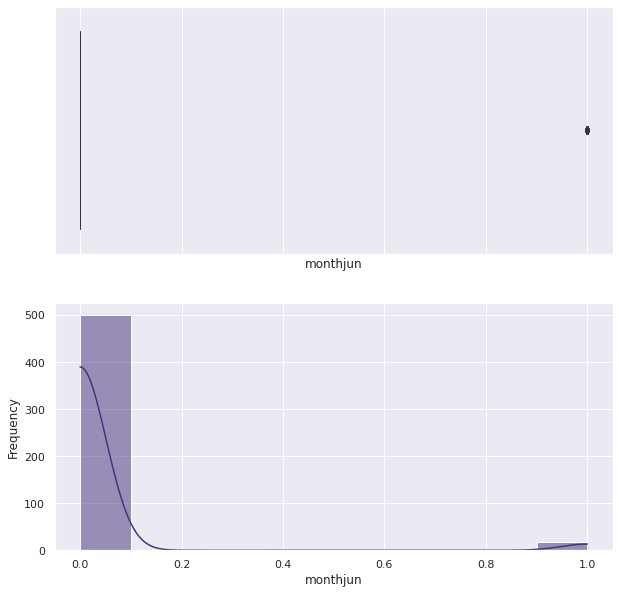

<Figure size 720x720 with 0 Axes>

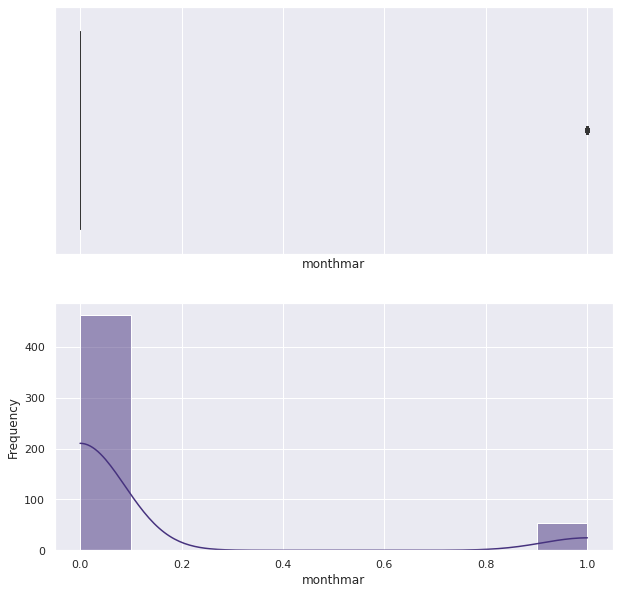

<Figure size 720x720 with 0 Axes>

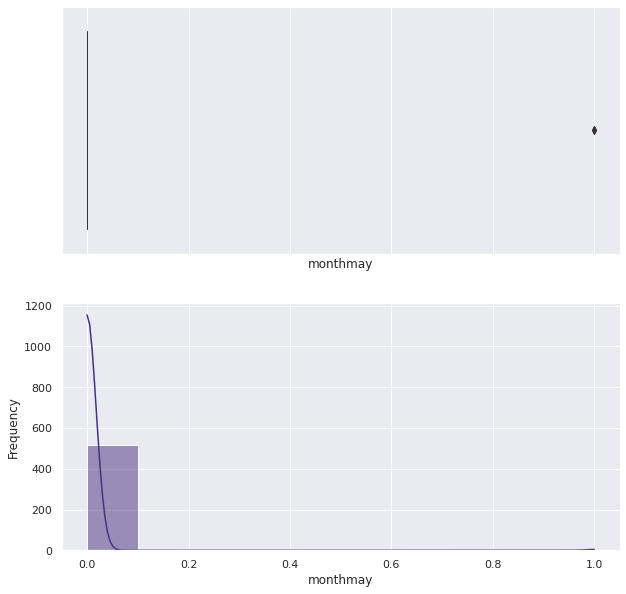

<Figure size 720x720 with 0 Axes>

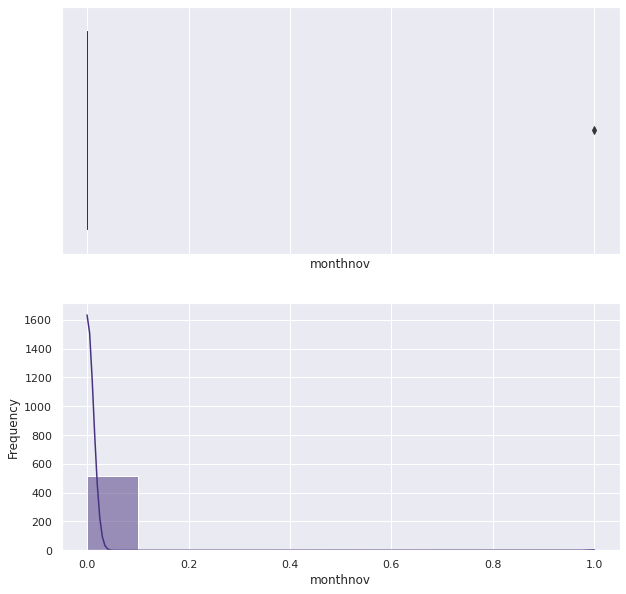

<Figure size 720x720 with 0 Axes>

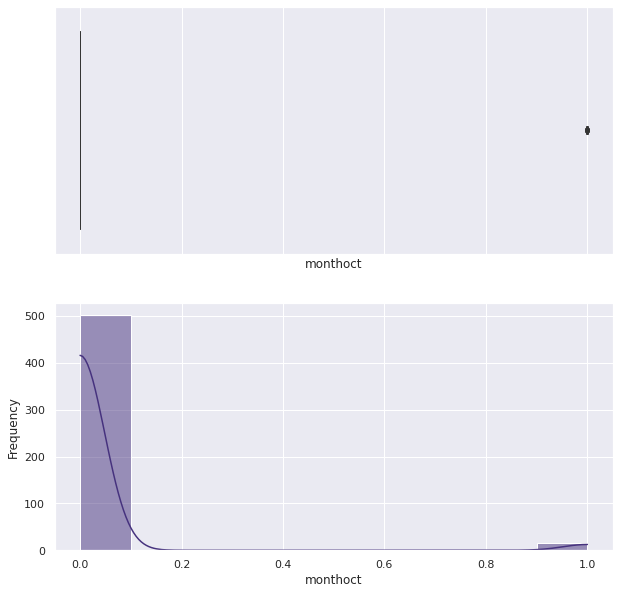

<Figure size 720x720 with 0 Axes>

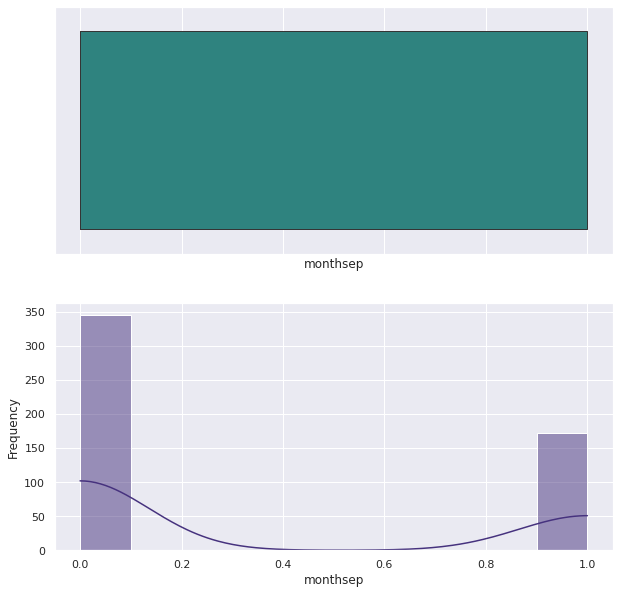

In [11]:
for i in numeric:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)}, palette="viridis")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0, palette="viridis")
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True, palette="viridis")

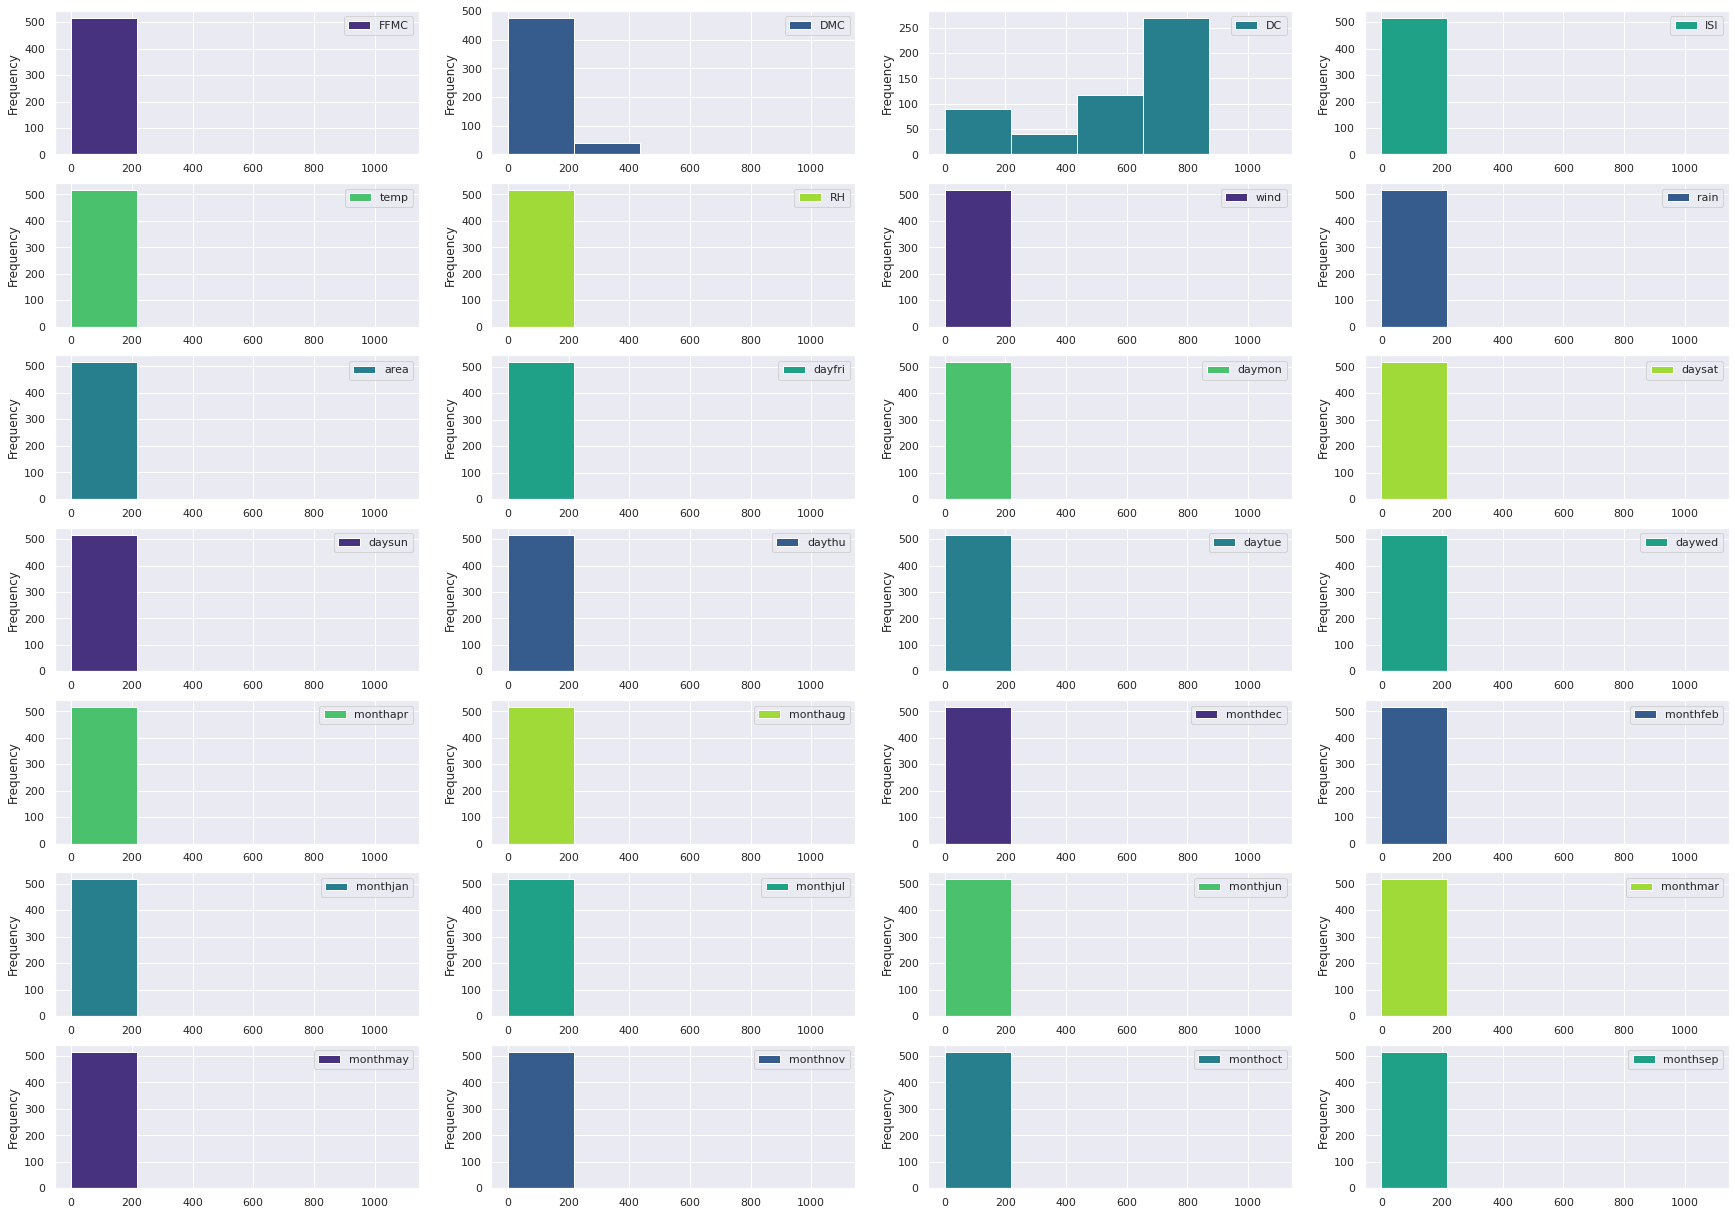

In [12]:
plt.rcParams['figure.figsize']=(30,28)
df.plot(kind='hist', bins=5, subplots=True, layout=(9,4), sharex=False, sharey=False)
plt.show()

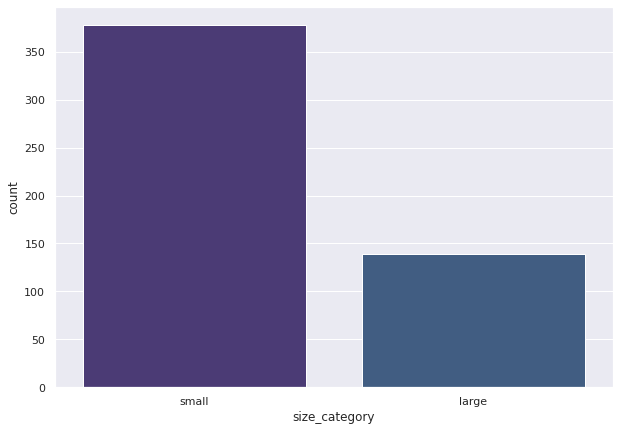

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(df["size_category"])
plt.show()

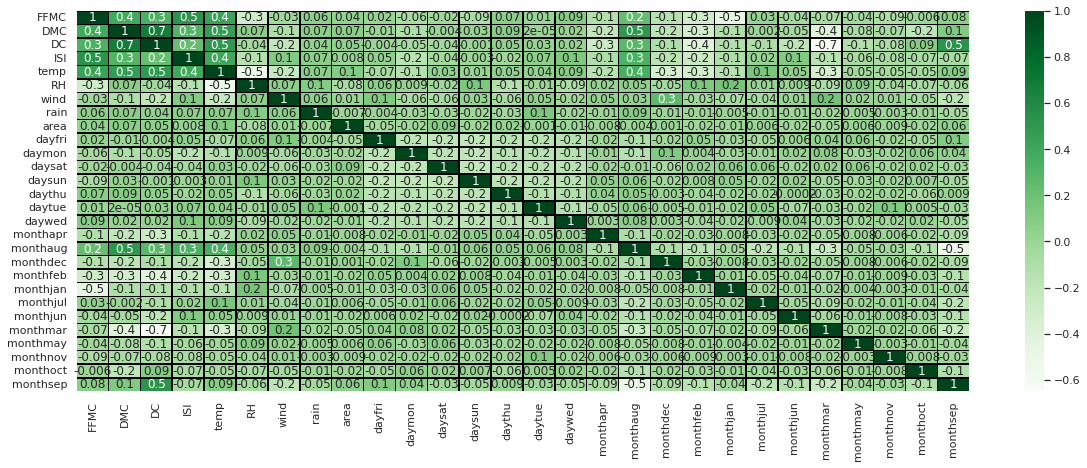

In [14]:
plt.figure(figsize=(20,7))
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="Greens", annot=True, linecolor='black', linewidths=0.5, fmt='.1g')
  
# displaying heatmap
plt.show()

# **Support Vector Machine**

## **Encoding Dependent Variable**

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['size_category'] = label_encoder.fit_transform(df['size_category'])

In [17]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


## **Scalling Data**

In [18]:
from sklearn.preprocessing import MinMaxScaler
data= df.drop(columns = ['month','day'])
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data

array([[0.87096774, 0.08649207, 0.1013252 , ..., 0.        , 0.        ,
        1.        ],
       [0.92774194, 0.11819435, 0.77541926, ..., 1.        , 0.        ,
        1.        ],
       [0.92774194, 0.14679531, 0.79629412, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.8116129 , 0.19159201, 0.77131465, ..., 0.        , 0.        ,
        0.        ],
       [0.97677419, 0.49931082, 0.71162191, ..., 0.        , 0.        ,
        1.        ],
       [0.78451613, 0.00654721, 0.11586725, ..., 0.        , 0.        ,
        1.        ]])

In [20]:
scaled_data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns, index=data.index)
scaled_data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
x = scaled_data.drop('size_category',axis=1)
y = scaled_data['size_category']
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.00000,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.00000,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.00000,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
512    0.0
513    0.0
514    0.0
515    1.0
516    1.0
Name: size_category, Length: 517, dtype: float64

## **Problem of Imbalance**
## **Over-Sampling : SMOTE**

In [23]:
scaled_data['size_category'].value_counts()

1.0    378
0.0    139
Name: size_category, dtype: int64

* Here, The data is imbalance, so we will use over-sampling method to overcome the problem.
* Here, we use SMOTE for over-sampling

In [24]:
import imblearn
from imblearn.over_sampling import SMOTE


over_sampler = SMOTE(random_state=42)
X_res, y_res = over_sampler.fit_resample(x, y)

In [25]:
X_res.shape, y_res.shape

((756, 28), (756,))

### **Data Visualization of all x variable with respect to y variable**

Visualiztion using TSNE



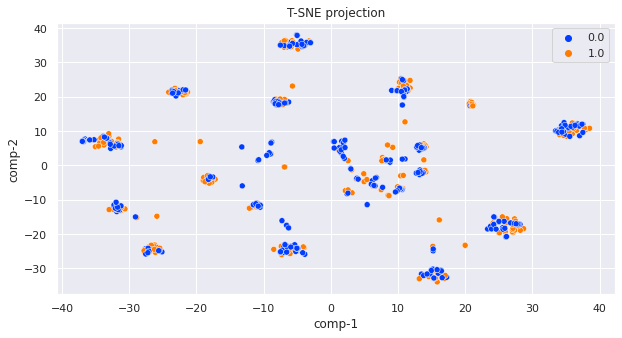

In [26]:
import sklearn
from sklearn.manifold import TSNE

print("Visualiztion using TSNE\n")
tsne = TSNE(n_components=2,random_state=123)
z = tsne.fit_transform(X_res)
df = pd.DataFrame()
df["y"] = y_res
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
    
plt.figure(figsize=(10,5))
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                 palette=sns.color_palette("bright", 2),
                data=df).set(title="T-SNE projection") 
plt.show()

## **Splitting Data into Training and Testing**

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)


In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(529, 28)
(227, 28)
(529,)
(227,)


In [29]:
y_test.value_counts()

1.0    121
0.0    106
Name: size_category, dtype: int64

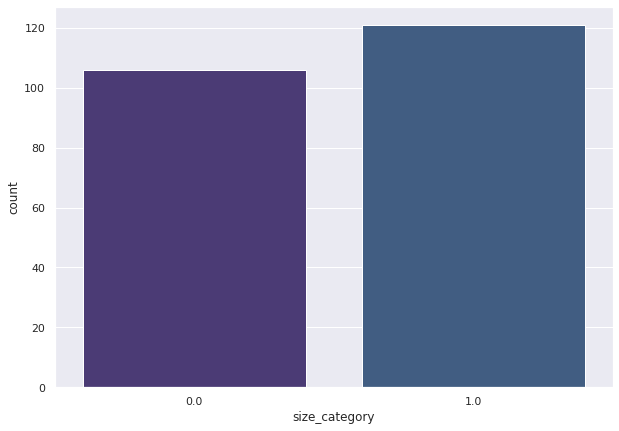

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(y_test)
plt.show()

## **Grid-Search - Tunning Parameters**


In [31]:
# function to find the best parameters using GridSearchCV
param_grid = [{"kernel" : ['linear', 'poly', 'rbf', 'sigmoi'],
               'C':np.geomspace(1e-3, 1e3, 7).tolist(), 'gamma': np.geomspace(1e-2, 1e1, 7).tolist()}]    
gsv = GridSearchCV(SVC( random_state=42), param_grid, verbose = 300)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 196 candidates, totalling 980 fits
[CV 1/5; 1/196] START C=0.001, gamma=0.01, kernel=linear........................
[CV 1/5; 1/196] END C=0.001, gamma=0.01, kernel=linear;, score=0.519 total time=   0.0s
[CV 2/5; 1/196] START C=0.001, gamma=0.01, kernel=linear........................
[CV 2/5; 1/196] END C=0.001, gamma=0.01, kernel=linear;, score=0.519 total time=   0.0s
[CV 3/5; 1/196] START C=0.001, gamma=0.01, kernel=linear........................
[CV 3/5; 1/196] END C=0.001, gamma=0.01, kernel=linear;, score=0.509 total time=   0.0s
[CV 4/5; 1/196] START C=0.001, gamma=0.01, kernel=linear........................
[CV 4/5; 1/196] END C=0.001, gamma=0.01, kernel=linear;, score=0.509 total time=   0.0s
[CV 5/5; 1/196] START C=0.001, gamma=0.01, kernel=linear........................
[CV 5/5; 1/196] END C=0.001, gamma=0.01, kernel=linear;, score=0.514 total time=   0.0s
[CV 1/5; 2/196] START C=0.001, gamma=0.01, kernel=poly..........................
[CV 1/5; 2/

GridSearchCV(estimator=SVC(random_state=42),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                          'gamma': [0.01, 0.03162277660168379, 0.1,
                                    0.31622776601683794, 1.0,
                                    3.1622776601683795, 10.0],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoi']}],
             verbose=300)

In [32]:
print(gsv.best_score_ ,'\n',"\n" , gsv.best_params_)


0.9753998203054808 
 
 {'C': 1000.0, 'gamma': 0.01, 'kernel': 'linear'}


In [33]:
kernel=['linear','rbf','poly']
c = np.geomspace(1e-3, 1e3, 7).tolist()
for x in kernel:
    acc = []
    for i in c:
        model = SVC(C =i, kernel= x, random_state=42, gamma=0.01)
        model.fit(x_train, y_train)
        train=model.score(x_train, y_train)
        test=model.score(x_test, y_test)
        acc.append([train, test])
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=c, y=[i[0] for i in acc],
                    mode='lines+markers',
                    name='Training'))
    fig.add_trace(go.Scatter(x=c, y=[i[1] for i in acc],
                    mode='lines+markers',
                    name='Testing'))
    fig.update_layout(title=x,
                   xaxis_title='value of C',
                   yaxis_title='Accuracy')
    fig.show()

* From the Graph, we can see that the 'linear' kernel gives better results.
* in Linear kernel , we would select value of c as 1000 because there is less difference between training and testing accuracy.so, there will be less problem of underfitting or overfitting.

## **Model Fitting**

* C= which defines the regularization of the error.
* kernel= which defines what type of function is used to transform the dataset
* gamma= defines how loosely the model will fit the training data, allowing you to prevent overfitting

In [34]:
model = SVC(C =1000, kernel= kernel[0], gamma = 0.01,random_state=42)
model.fit(x_train,y_train)

SVC(C=1000, gamma=0.01, kernel='linear', random_state=42)

In [35]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1.0    128
0.0     99
dtype: int64

In [36]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 0.9868
Test set score: 0.9515


In [37]:
# print the scores between dependent test and predicted value
print("Accuracy_score", accuracy_score(y_test,preds)*100)

Accuracy_score 95.15418502202643


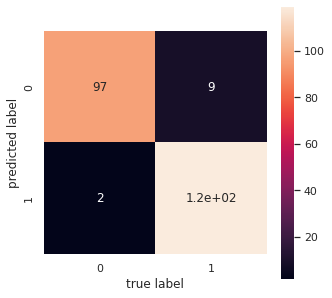

In [38]:
# Confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize = (5,5))
sns.heatmap(cm, square=True, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [39]:
# Classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95       106
         1.0       0.93      0.98      0.96       121

    accuracy                           0.95       227
   macro avg       0.95      0.95      0.95       227
weighted avg       0.95      0.95      0.95       227



Model AUC score: 0.9492827070014035 




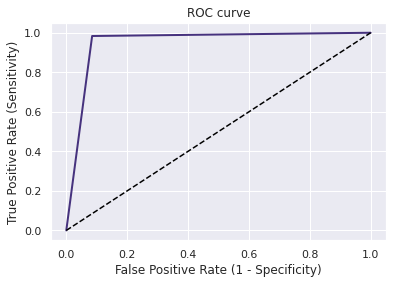

In [40]:
# AUC and ROC
print(f'Model AUC score: {roc_auc_score(y_test, preds)} \n\n')

fpr, tpr, thresholds = roc_curve(y_test, preds)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()


## **Visualiztion of Model**

In [41]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA


In [42]:
#ytt = y_train.to_numpy()

ytt = y_train.to_numpy().astype(np.integer)
pca = PCA(n_components = 2)
x_train2 = pca.fit_transform(x_train)
model.fit(x_train2,ytt)

SVC(C=1000, gamma=0.01, kernel='linear', random_state=42)

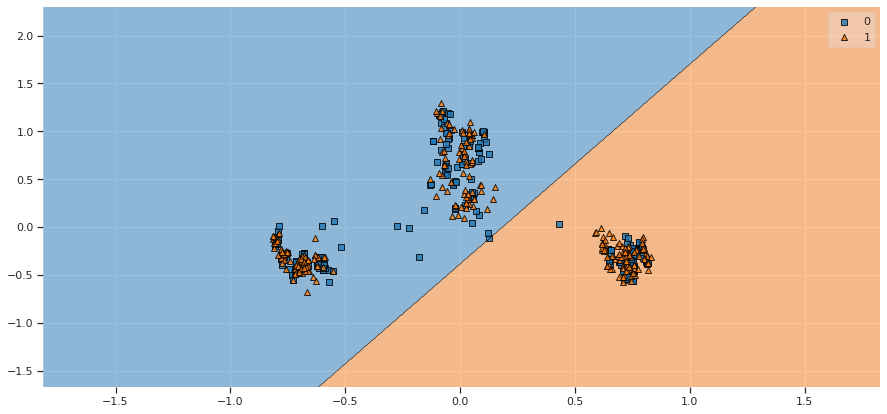

In [43]:
plt.figure(figsize=(15,7))
plot_decision_regions(x_train2,ytt, clf=model)
plt.show()


## **Recursive Feature Elimination**

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [45]:
rfe = RFE(model)
fit = rfe.fit(x_train,y_train)

In [46]:
#Num Features: 
fit.n_features_

14

In [47]:
# Feature Ranking:
fit.ranking_

array([ 1,  1,  8,  1,  3, 10,  1,  2,  1, 11,  7,  4, 12,  5,  1,  6,  1,
        1,  1,  9, 15,  1,  1,  1, 14, 13,  1,  1])

In [48]:
fit.support_

array([ True,  True, False,  True, False, False,  True, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
        True, False, False,  True,  True,  True, False, False,  True,
        True])

In [49]:
#Selected Features:
a=list(fit.support_)
b=X_res.columns.to_list()
for x, y in zip(a, b):
    print(x, y, sep='\t\t')

True		FFMC
True		DMC
False		DC
True		ISI
False		temp
False		RH
True		wind
False		rain
True		area
False		dayfri
False		daymon
False		daysat
False		daysun
False		daythu
True		daytue
False		daywed
True		monthapr
True		monthaug
True		monthdec
False		monthfeb
False		monthjan
True		monthjul
True		monthjun
True		monthmar
False		monthmay
False		monthnov
True		monthoct
True		monthsep


In [50]:
X_res=X_res[['FFMC','DMC','ISI','wind','area','daytue','monthapr', 'monthaug', 'monthdec',
             'monthjul','monthjun', 'monthmar','monthoct', 'monthsep']]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [52]:
model = SVC(C =1000, kernel= kernel[0], gamma = 0.01,random_state=42)

model.fit(x_train,y_train)

preds = model.predict(x_test)

In [53]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 0.9887
Test set score: 0.9515


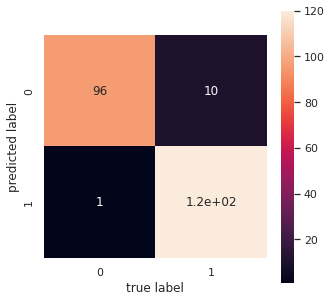

In [54]:
# Confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize = (5,5))
sns.heatmap(cm, square=True, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [55]:
# Classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95       106
         1.0       0.92      0.99      0.96       121

    accuracy                           0.95       227
   macro avg       0.96      0.95      0.95       227
weighted avg       0.95      0.95      0.95       227

